# Diagnostic of models

In [1]:
import pandas as pd 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
housing = pd.DataFrame.from_csv('../data/housing.csv')
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


In [3]:
model = smf.ols(formula='MEDV~RM', data=housing).fit()

# Here are estimated intercept and slope by least square estimation 
b0_ols = model.params[0]
b1_ols = model.params[1]

housing['BestResponse'] = b0_ols + b1_ols*housing['LSTAT']

# Assumptions behind linear regression model
1. Linearity 
2. independence
3. Normality
4. Equal Variance

## Linearity

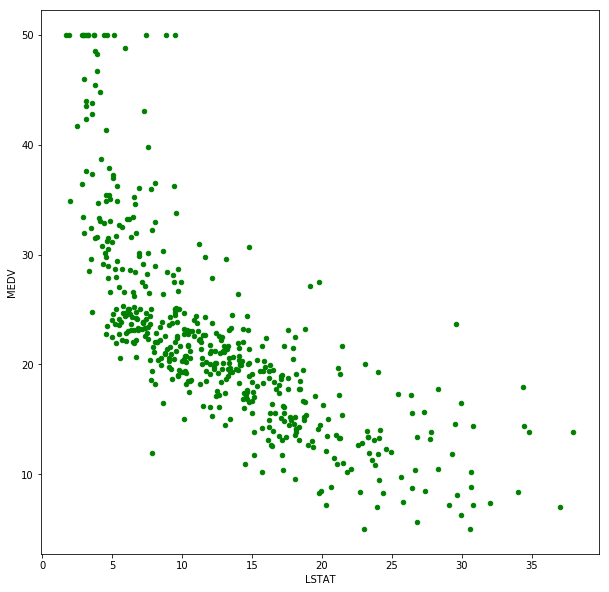

In [4]:
# you can check the scatter plot to have a fast check
housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(10, 10), color='g')

# Independence

In [5]:
# Get all errors (residuals)
housing['error'] = housing['MEDV'] - housing['BestResponse']

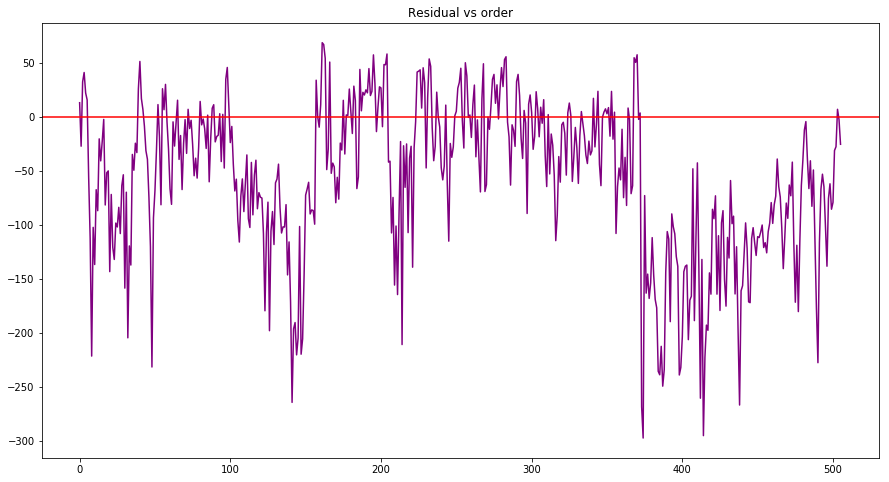

In [6]:
# Method 1: Residual vs order plot
# error vs order plot (Residual vs order) as a fast check 
plt.figure(figsize=(15, 8))
plt.title('Residual vs order')
plt.plot(housing.index, housing['error'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

In [7]:
# Method 2: Durbin Watson Test
# Check the Durbin Watson Statistic
# Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 11 Jan 2019   Prob (F-statistic):           2.49e-74
Time:                        15:32:00   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Normality

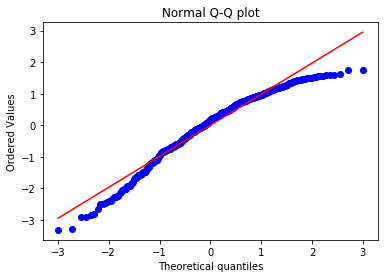

In [8]:
import scipy.stats as stats
z = (housing['error'] - housing['error'].mean())/housing['error'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

# Equal variance

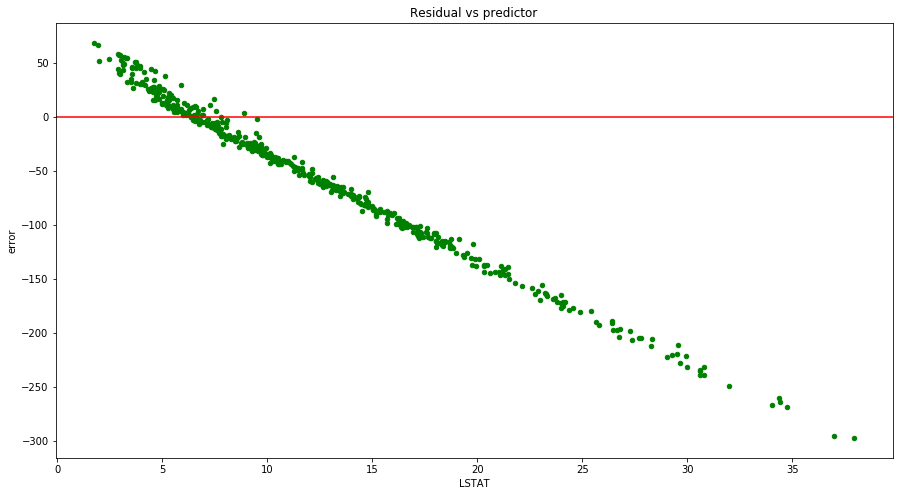

In [9]:
# Residual vs predictor plot
housing.plot(kind='scatter', x='LSTAT', y='error', figsize=(15, 8), color='green')
plt.title('Residual vs predictor')
plt.axhline(y=0, color='red')
plt.show()

## We can see that the regression model (MEDV~LSTAT) violates all four assumptions. Therefore, we cannot make statistical inference using this model.